In [1]:
#|default_exp app

# "Is it a cat or a dog?"-App

This notebook the exported model `export.pkl` form the [trainig notebook](../cat_or_dog2-training.ipynb), to create a python script which can run the model on HuggingFace. 

In [10]:
#|export
from fastai.vision.all import *
import gradio as gr

Let's take a look at an example picture:

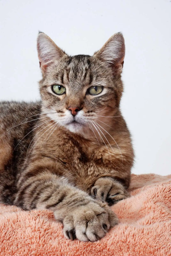

In [11]:
im = PILImage.create('cat.jpg')

im.thumbnail((256, 256))
im

Let's import the model and create the learner:

In [12]:
#|export
learn = load_learner('export.pkl')

With the learner we can to the predictions (inference):

In [13]:
learn.predict(im)

('cat', TensorBase(0), TensorBase([9.9997e-01, 2.5052e-05]))

The available categories are contained in the vocab:

In [14]:
learn.dls.vocab

['cat', 'dog']

This is the function to classify the images:

In [15]:
#|export
def classify_image(img):
    pred,pred_idx,probs = learn.predict(img)
    return dict(zip(learn.dls.vocab, map(float, probs)))

Testing the function:

In [16]:
classify_image(im)

{'cat': 0.9999749660491943, 'dog': 2.5051804186659865e-05}

## Gradio App

Now it is time to create the gradio app:

In [17]:
# commented, because it produced warnings

#image = gr.inputs.Image(shape=(192,192))
#label = gr.outputs.Label()

In [19]:
#|export
image = gr.components.Image(shape=(192,192))
label = gr.components.Label()
examples = ['cat.jpg', 'dog.jpg']

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.


(<gradio.routes.App at 0x7f39290b8e20>, 'http://127.0.0.1:7862/', None)

In [20]:
intf.close()

Closing server running on port: 7862


## Export

Finally, we export the code in the cells which are marked with `#|export`:

In [21]:
# commented, because it does not work

# import notebook2script from nbdev.export
# notebook2script('app.ipynb')

In [22]:
from nbdev import nbdev_export

In [23]:
nbdev_export('app.ipynb')
print('Export successful')

InterpolationMissingOptionError: Bad value substitution: option 'lib_name' in section 'DEFAULT' contains an interpolation key 'repo' which is not a valid option name. Raw value: '%(repo)s'

Even though this failed, I think it is good enough.